In [ ]:
pip install geopandas

In [21]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

In [ ]:
census_tracts_path_2000 = "C:/Users/willq/Documents/Independent R project/2000/TRACT_LINES_2000/tl_2010_17031_tract00.shp"
census_tracts_path_2010 = "C:/Users/willq/Documents/Independent R project/2010/TRACT_LINES_2010/tl_2010_17031_tract10.shp"

census_tracts_2000 = gpd.read_file(census_tracts_path_2000)
census_tracts_2010 = gpd.read_file(census_tracts_path_2010)

csv_path = "C:/Users/willq/Documents/Independent R project/CTA_RAW_DATA/CTA_STOP_INFO.csv"
df = pd.read_csv(csv_path)

# Extract latitude and longitude from the 'location' column
df['latitude'] = df['Location'].str.extract(r'\(([^,]+),')[0].astype(float)
df['longitude'] = df['Location'].str.extract(r', ([^,]+)\)')[0].astype(float)

# Drop the 'location' column if no longer needed
df.drop(columns=['Location'], inplace=True)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['longitude'], df['latitude']),
    crs="EPSG:4326"  # Assuming WGS 84 (GPS coordinates)
)

# Preview the GeoDataFrame
print(gdf.head())

In [49]:
#2000
# Step 1: Reproject Both Datasets to a Projected CRS
# EPSG:3435 is suitable for Chicago area (Illinois State Plane East)
gdf = gdf.to_crs("EPSG:3435")
census_tracts_2000 = census_tracts_2000.to_crs(gdf.crs)

# Step 3: Calculate the Centroid of Each Census Tract
census_tracts_2000['centroid'] = census_tracts_2000.geometry.centroid

# Step 4: Find the Closest Station for Each Census Tract with Distance Check
def find_closest_station(tract, stations, max_distance=4000):
    # Calculate distances from the tract's centroid to all stations
    distances = stations.distance(tract['centroid'])
    
    # Find the index of the closest station
    closest_station_idx = distances.idxmin()
    
    # Get the minimum distance to the closest station
    closest_distance = distances.min()
    
    # If the closest station is within the specified max_distance, return the station ID
    if closest_distance <= max_distance:
        return stations.iloc[closest_station_idx]['MAP_ID'], closest_distance
    else:
        # Return NaN if the station is too far
        return np.nan, np.nan

# Apply the function to find the closest station for each tract and calculate the distance
census_tracts_2000['closest_station_id'], census_tracts_2000['distance_to_station'] = zip(
    *census_tracts_2000.apply(find_closest_station, stations=gdf, axis=1)
)

# Step 5: Filter out tracts with no valid closest station (distance > 1000 meters)
census_tracts_2000_filtered = census_tracts_2000.dropna(subset=['closest_station_id'])

# Step 6: Save the filtered result to CSV
census_tracts_2000_filtered.drop(columns=['geometry', 'centroid', 'distance_to_station']).to_csv(
    'C:/Users/willq/Documents/tracts_with_closest_station_filtered.csv', index=False
)


C:\Users\willq\AppData\Local\Temp\ipykernel_10620\2538918779.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\willq\AppData\Local\Temp\ipykernel_10620\2538918779.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


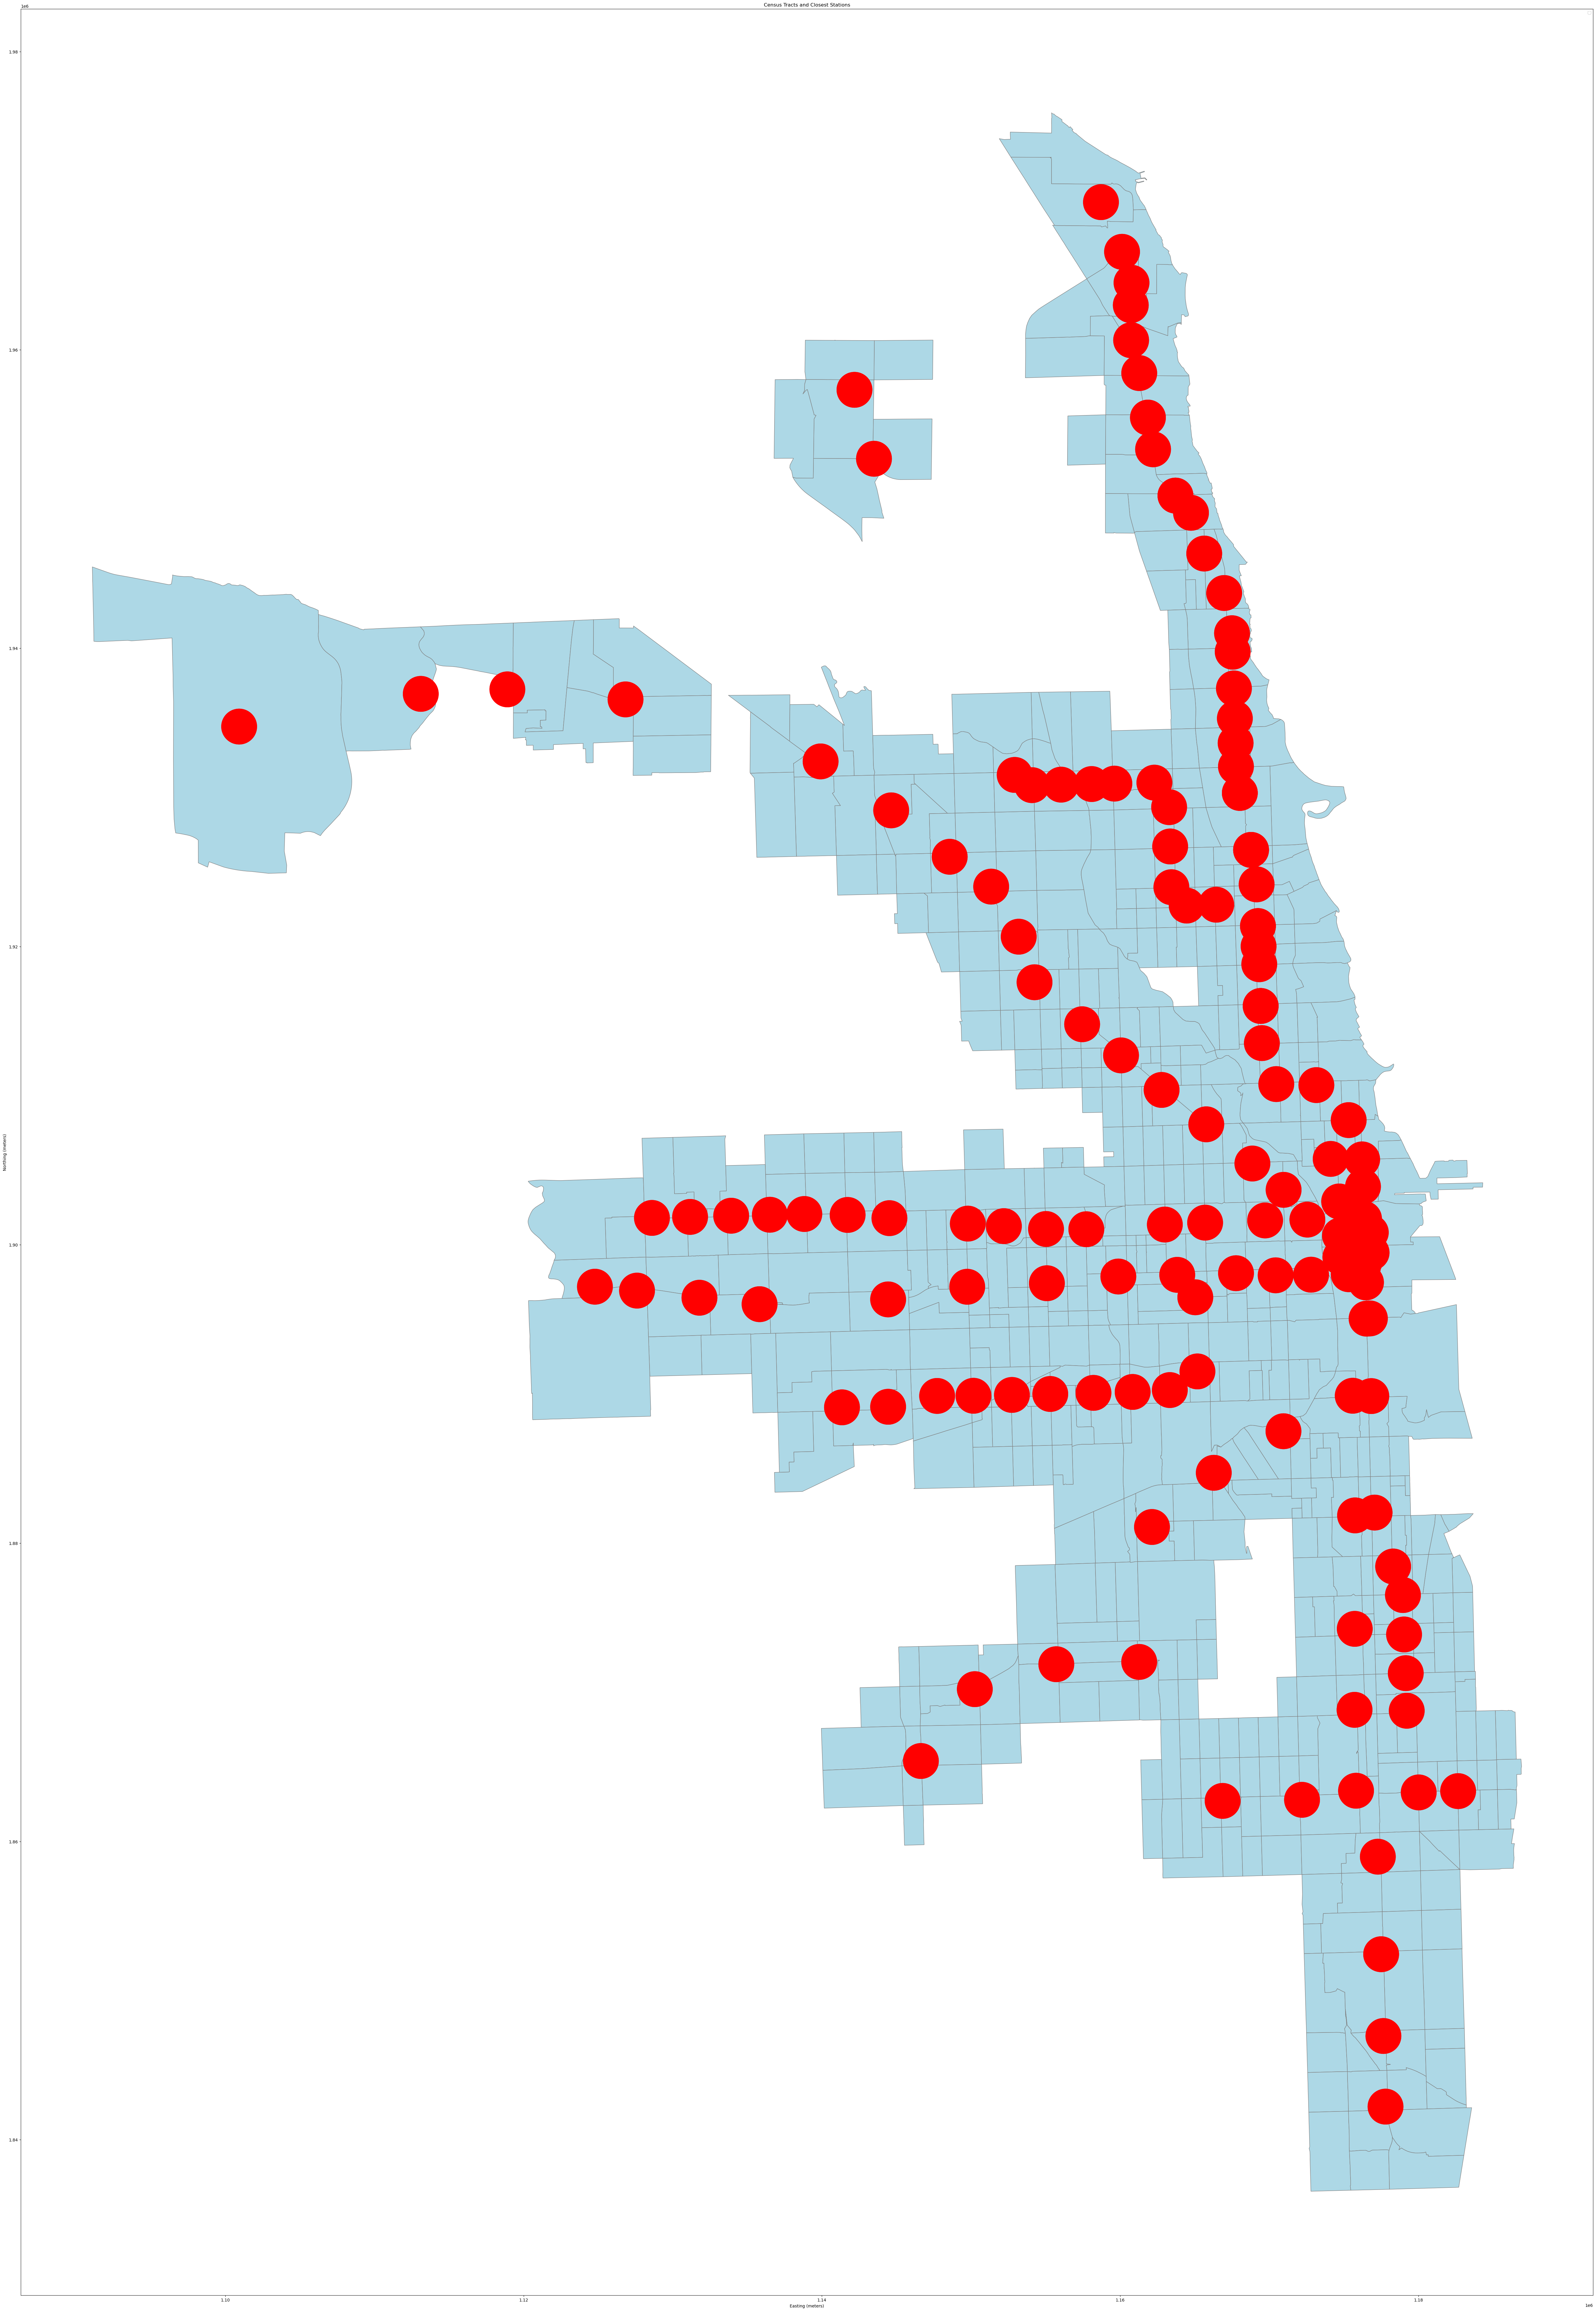

In [53]:
import matplotlib.pyplot as plt

# Plot the census tracts
ax = census_tracts_2000_filtered.plot(color="lightblue", edgecolor="gray", figsize=(100, 100))

# Plot the stations
gdf.plot(ax=ax, color="red", marker="o", label="Stations")

# Customize the map
plt.title("Census Tracts and Closest Stations")
plt.legend()
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")

# Save the plot to a PDF file
plt.savefig('C:/Users/willq/Documents/census_tracts_with_stations_2000.pdf', format='pdf', bbox_inches='tight')

# Display the plot in the console
plt.show()


C:\Users\willq\AppData\Local\Temp\ipykernel_10620\2945737390.py:50: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\willq\AppData\Local\Temp\ipykernel_10620\2945737390.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


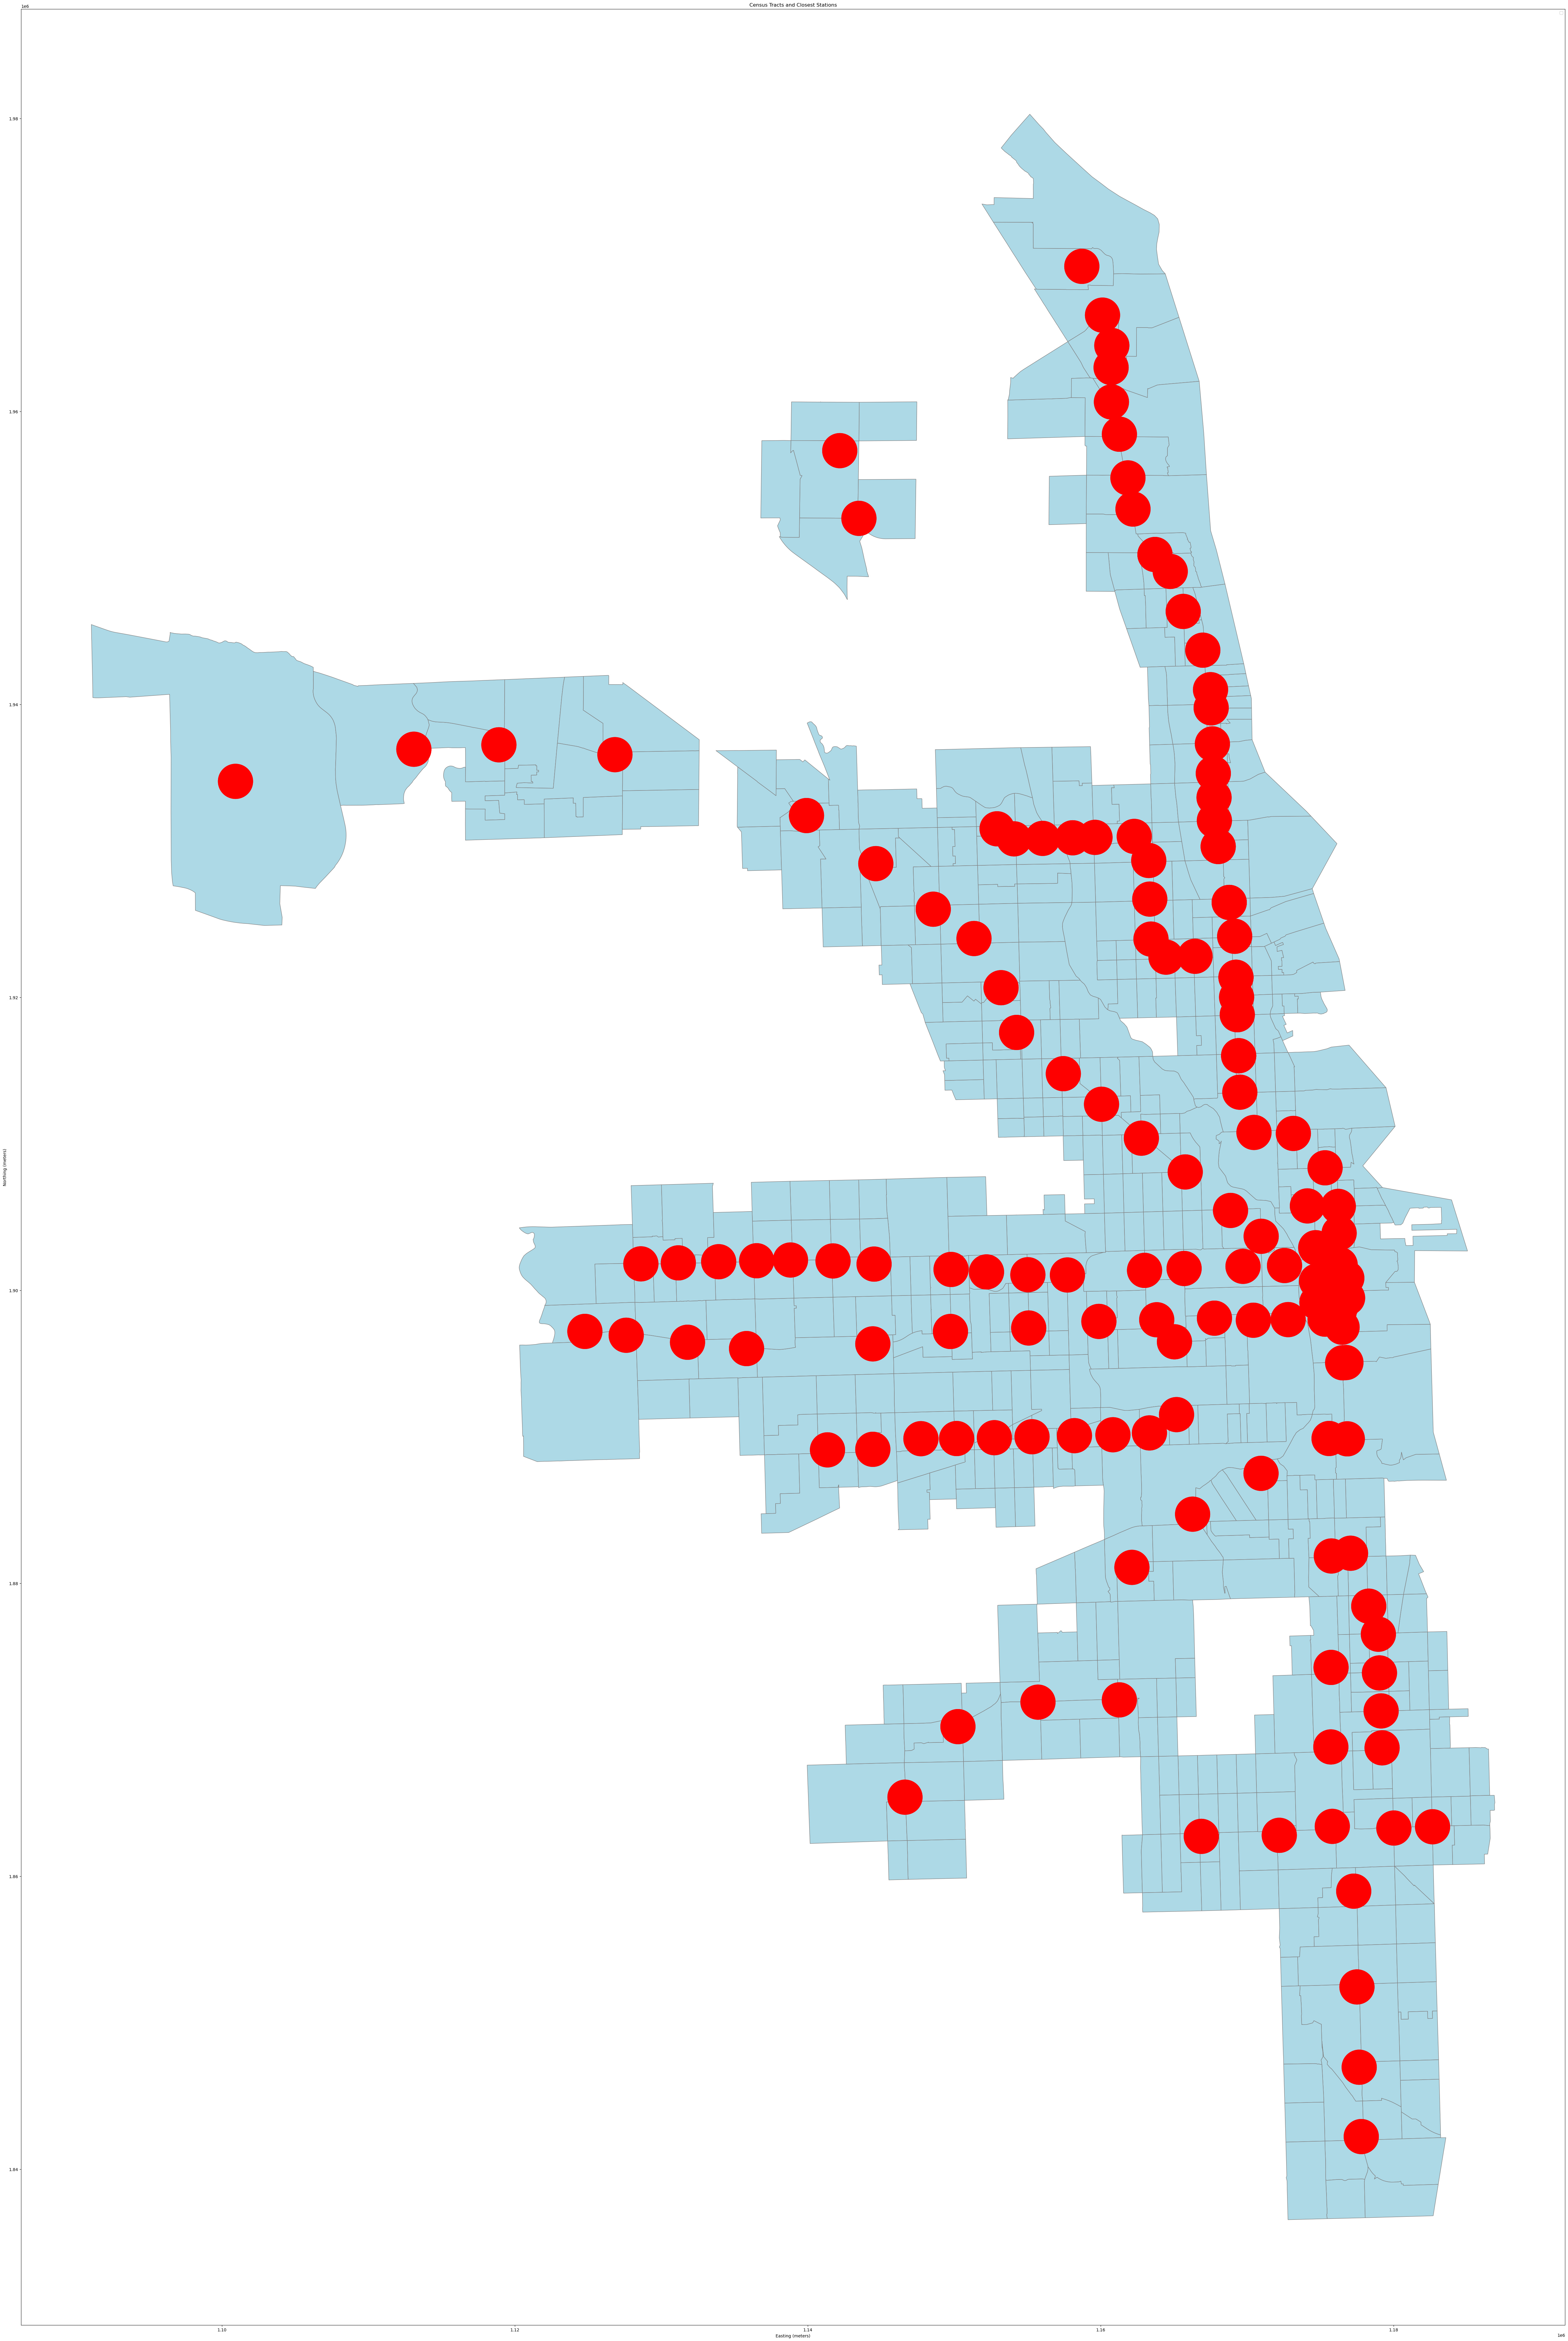

In [55]:
#2010
# Step 1: Reproject Both Datasets to a Projected CRS
# EPSG:3435 is suitable for Chicago area (Illinois State Plane East)
gdf = gdf.to_crs("EPSG:3435")
census_tracts_2010 = census_tracts_2010.to_crs(gdf.crs)

# Step 3: Calculate the Centroid of Each Census Tract
census_tracts_2010['centroid'] = census_tracts_2010.geometry.centroid

# Step 4: Find the Closest Station for Each Census Tract with Distance Check
def find_closest_station(tract, stations, max_distance=4000):
    # Calculate distances from the tract's centroid to all stations
    distances = stations.distance(tract['centroid'])
    
    # Find the index of the closest station
    closest_station_idx = distances.idxmin()
    
    # Get the minimum distance to the closest station
    closest_distance = distances.min()
    
    # If the closest station is within the specified max_distance, return the station ID
    if closest_distance <= max_distance:
        return stations.iloc[closest_station_idx]['MAP_ID'], closest_distance
    else:
        # Return NaN if the station is too far
        return np.nan, np.nan

# Apply the function to find the closest station for each tract and calculate the distance
census_tracts_2010['closest_station_id'], census_tracts_2010['distance_to_station'] = zip(
    *census_tracts_2010.apply(find_closest_station, stations=gdf, axis=1)
)

# Step 5: Filter out tracts with no valid closest station (distance > 1000 meters)
census_tracts_2010_filtered = census_tracts_2010.dropna(subset=['closest_station_id'])

# Step 6: Save the filtered result to CSV
census_tracts_2010_filtered.drop(columns=['geometry', 'centroid', 'distance_to_station']).to_csv(
    'C:/Users/willq/Documents/tracts_with_closest_station_filtered.csv', index=False
)
import matplotlib.pyplot as plt

# Plot the census tracts
ax = census_tracts_2010_filtered.plot(color="lightblue", edgecolor="gray", figsize=(100, 100))

# Plot the stations
gdf.plot(ax=ax, color="red", marker="o", label="Stations")

# Customize the map
plt.title("Census Tracts and Closest Stations")
plt.legend()
plt.xlabel("Easting (meters)")
plt.ylabel("Northing (meters)")

# Save the plot to a PDF file
plt.savefig('C:/Users/willq/Documents/census_tracts_with_stations_2010.pdf', format='pdf', bbox_inches='tight')

# Display the plot in the console
plt.show()